<a href="https://colab.research.google.com/github/Stephanusc/TB1VisualisasiData/blob/main/TB1VisualisasiData_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar 1 Visualisasi Data EDA :Univariate - Bivariate -Multivariate Analysis

# ## Dataset :

The data contains demographic details, work-related metrics and attrition flag.

* **employeeNumber** - employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee 1
* **BusinessTravel** - Travel commitments for the job 1
* **DailyRate** - Data description not available** 3
* **Department** - employee Department 5
* **DistanceFromHome** - Distance from work to home (in km) 1
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor 1
* **EducationField** - Field of Education 3
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High 1
* **Gender** - employee's gender 1
* **HourlyRate** - Data description not available** 2
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High 1
* **JobLevel** - Level of job (1 to 5) 2
* **JobRole** - Job Roles 1
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High 1
* **MaritalStatus** - Marital Status 1
* **MonthlyIncome** - Monthly Salary 1
* **MonthlyRate** - Data description not available** 3
* **NumCompaniesWorked** - Number of companies worked at 2
* **Over18** - Over 18 years of age? 2
* **OverTime** - Overtime? 1
* **PercentSalaryHike** - The percentage increase in salary last year 1
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding 1
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High 1
* **StandardHours** - Standard Hours 3
* **StockOptionLevel** - Stock Option Level 3
* **TotalWorkingYears** - Total years worked 1
* **TrainingTimesLastYear** - Number of training attended last year 1
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding 1
* **YearsAtCompany** - Years at Company 1
* **YearsInCurrentRole** - Years in the current role 1
* **YearsSinceLastPromotion** - Years since the last promotion 3
* **YearsWithCurrManager** - Years with the current manager 3

# EDA

(1) Drop semua kolom yang tidak diperlukan pada data employee.csv. Lakukan EDA univariat untuk setiap kolom numerik pada employee.csv yang mencakup:<p>
    a. histogram dan boxplot untuk tiap kolom<p>
    b. metrik statistik dasar untuk tiap kolom: mean, std, min, q1, q2, q3, iqr, max<p>
    c. identifikasi nilai upper whisker dan lower whisker dari boxplot tiap kolom<p>
    d. apabila terdapat outlier (<q1-1.5*iqr | >q3+1.5*iqr): hitung count, proportion, dan list dari outlier tiap kolom<p>
    e. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

(2) Lakukan EDA univariat untuk setiap kolom kategorikal pada employee.csv yang mencakup:

a. countplot untuk tiap kolom

b. daftar kategori unik dan frekuensinya untuk tiap kolom

c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

(3) Lakukan EDA multivariat untuk pasangan kolom numerik dan kolom 'Attrition' pada employee.csv yang mencakup:

a. boxplot (atau variasinya) antara semua kolom numerik (axis y) dan kolom 'attrition' (axis x)

b. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

(4) Lakukan EDA multivariat untuk pasangan kolom kategorikal dan kolom 'Attrition' pada employee.csv yang mencakup:

a. countplot untuk tiap kolom kategorikal dengan kolom 'Attrition' sebagai hue

b. stacked barplot yang menunjukkan proporsi value kolom 'Attrition' untuk masing-masing kategori pada semua kolom kategorikal (1 kolom kategorikal 1 plot, 1 plot berisi stacked bar sejumlah banyaknya kategori unik pada kolom kategori tersebut)

c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

In [72]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [38]:
df = pd.read_csv('employee.csv')
df.head()

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6,4,0,5
1,1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,...,4,80,1,10,3,3,10,7,1,7
2,2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,...,2,80,0,7,3,3,0,0,0,0
3,3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,...,3,80,0,8,3,3,8,7,3,0
4,4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,...,4,80,1,6,3,3,2,2,2,2


In [39]:
employee.drop(columns=['EmployeeNumber','StandardHours','Over18'])

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
2936,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
2937,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
2938,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [90]:
df.dtypes

Unnamed: 0                   int64
EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [102]:
df.describe()

,Unnamed: 0,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1469.500000,1470.500000,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,848.849221,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,0.000000,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,734.750000,735.750000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1469.500000,1470.500000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2204.250000,2205.250000,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2939.000000,2940.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [92]:
df.shape

(2940, 35)

<Axes: xlabel='Attrition', ylabel='Age'>

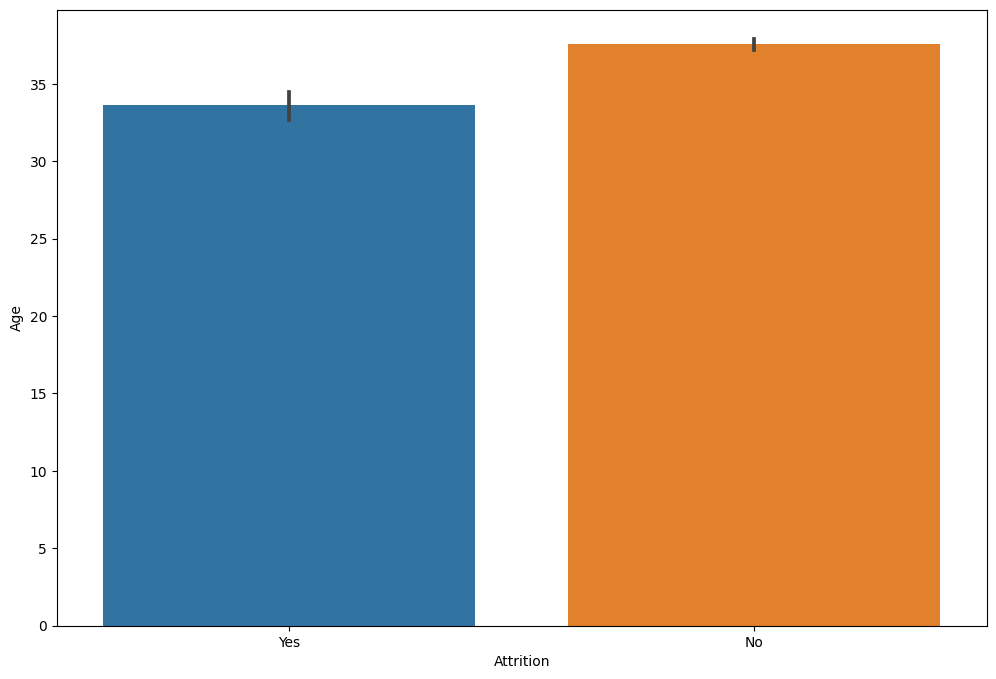

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Attrition', y = 'Age', data=df)

<Axes: xlabel='Age', ylabel='count'>

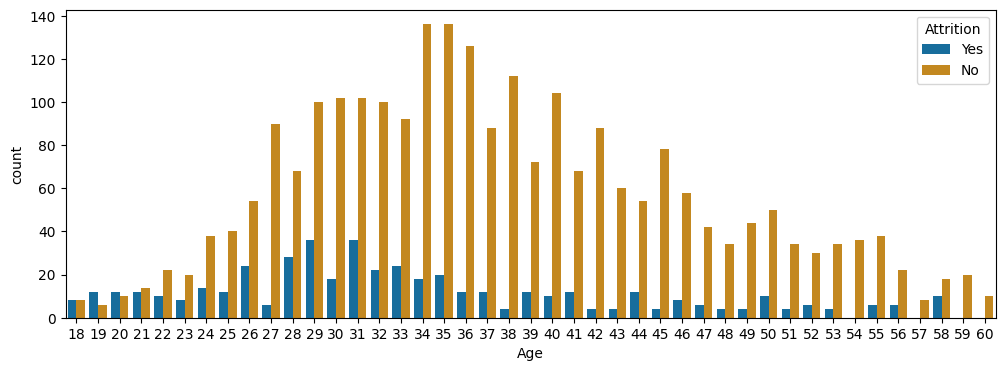

In [116]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data = df, palette = 'colorblind')

In [94]:
df['Age'].value_counts()

35    156
34    154
36    138
31    138
29    136
32    122
30    120
33    116
38    116
40    114
37    100
27     96
28     96
42     92
39     84
45     82
41     80
26     78
44     66
46     66
43     64
50     60
25     52
24     52
49     48
47     48
55     44
51     38
53     38
48     38
54     36
52     36
22     32
56     28
23     28
58     28
21     26
20     22
59     20
19     18
18     16
60     10
57      8
Name: Age, dtype: int64

<Axes: ylabel='count'>

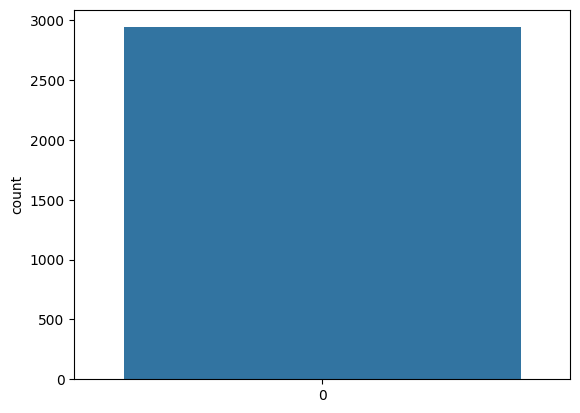

In [98]:
sns.countplot(df['Age'])

<Axes: xlabel='Attrition', ylabel='Age'>

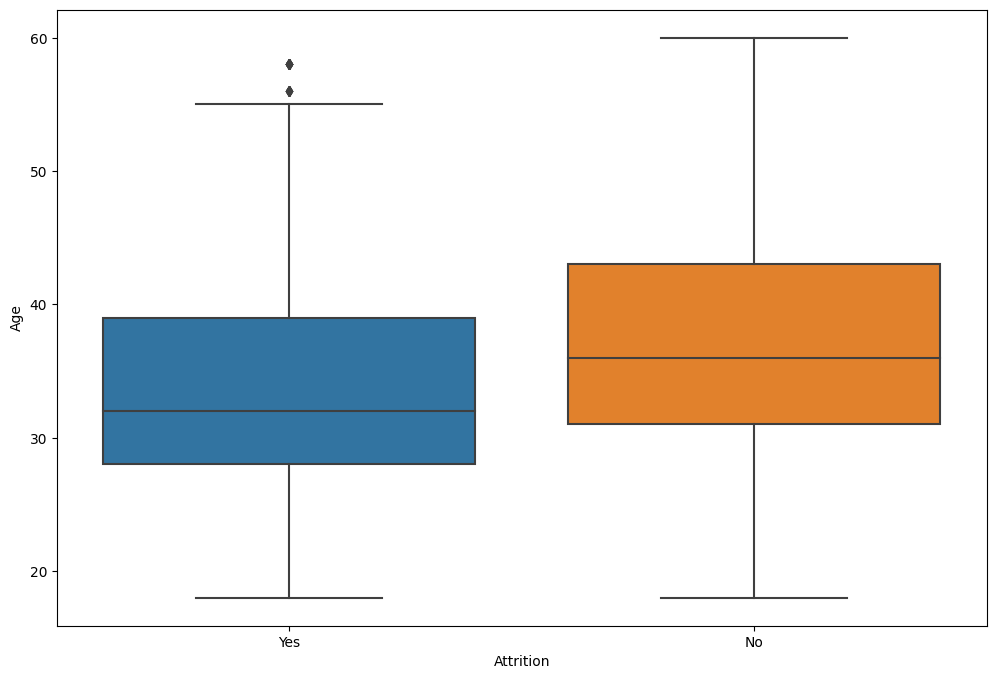

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Attrition', y = 'Age', data=df)

<Axes: xlabel='Attrition', ylabel='Education'>

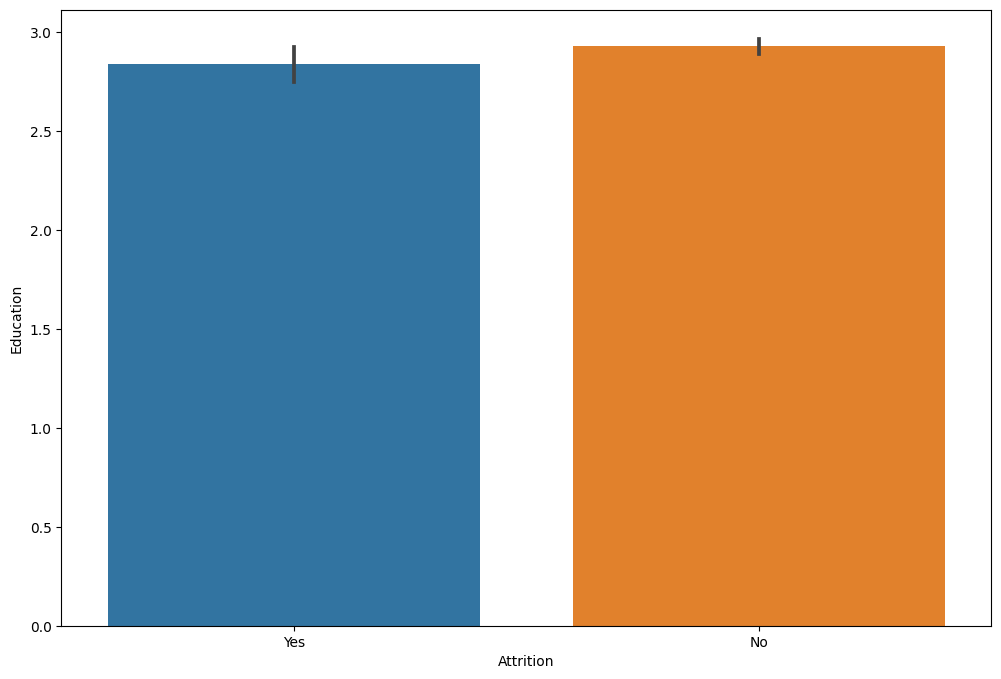

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Attrition', y = 'Education', data=df)

<Axes: xlabel='Education', ylabel='count'>

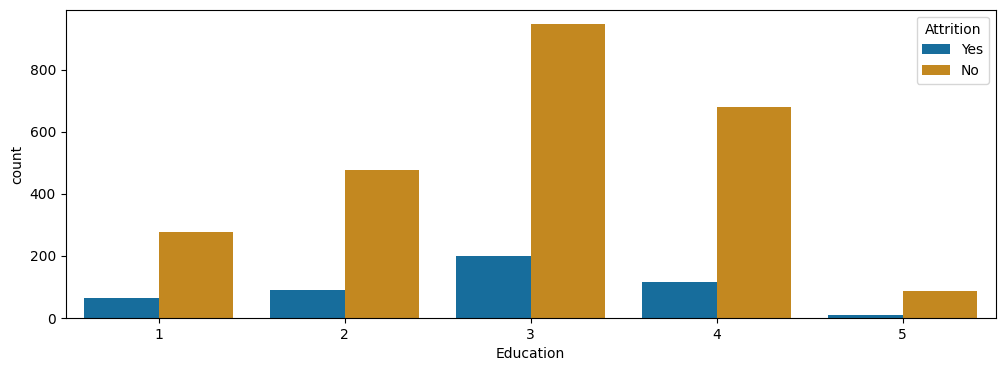

In [117]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Education', hue='Attrition', data = df, palette = 'colorblind')

<Axes: ylabel='count'>

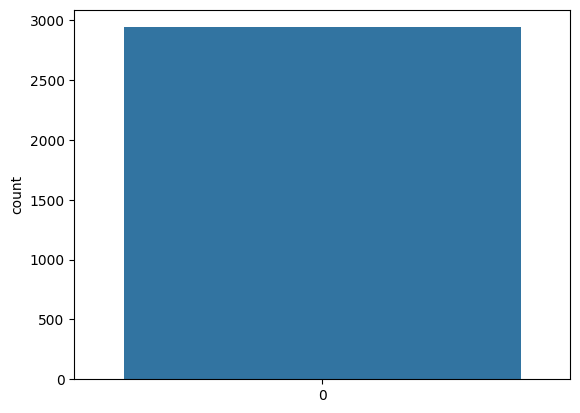

In [99]:
sns.countplot(df['Education'])

In [95]:
df['Education'].value_counts()

3    1144
4     796
2     564
1     340
5      96
Name: Education, dtype: int64

<Axes: xlabel='Attrition', ylabel='Education'>

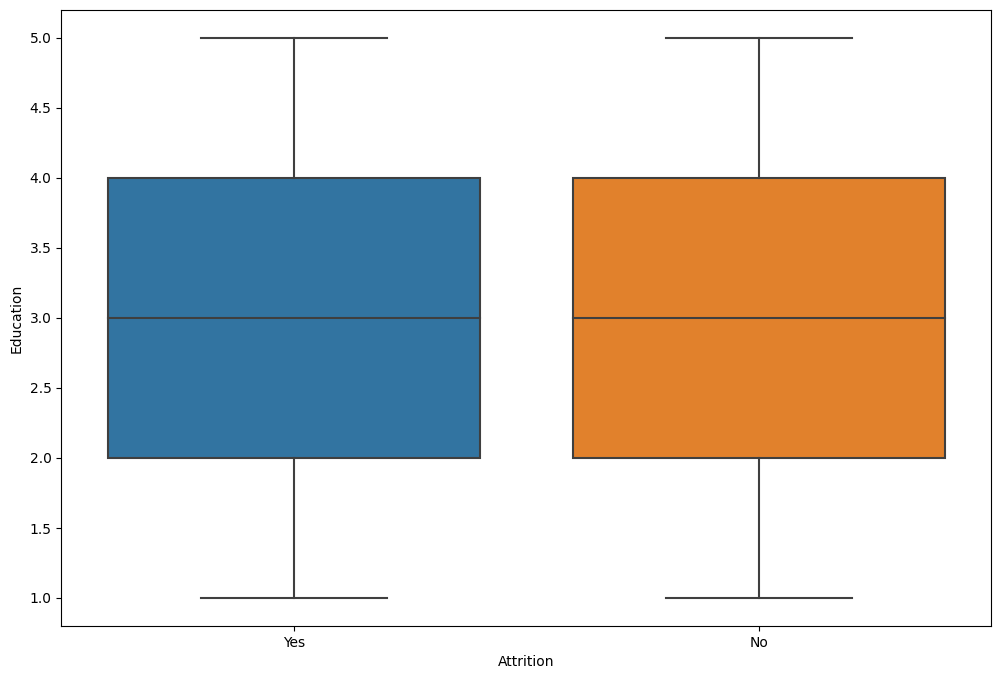

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Attrition', y = 'Education', data=df)

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

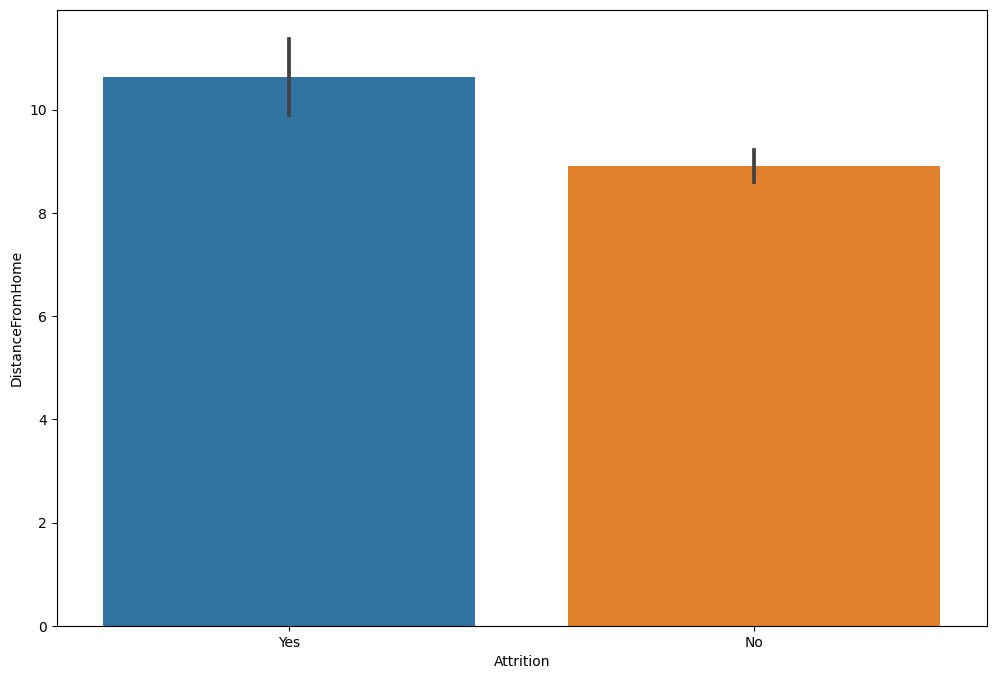

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Attrition', y = 'DistanceFromHome', data=df)

<Axes: xlabel='DistanceFromHome', ylabel='count'>

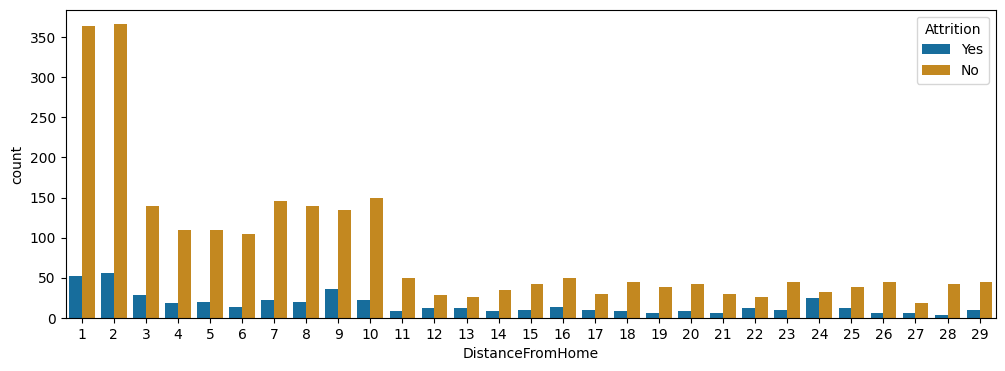

In [119]:
plt.subplots(figsize=(12,4))
sns.countplot(x='DistanceFromHome', hue='Attrition', data = df, palette = 'colorblind')

In [96]:
df['DistanceFromHome'].value_counts()

2     422
1     416
10    172
9     170
3     168
7     168
8     160
5     130
4     128
6     118
16     64
11     58
24     56
23     54
29     54
15     52
18     52
26     50
25     50
20     50
28     46
19     44
14     42
12     40
17     40
22     38
13     38
21     36
27     24
Name: DistanceFromHome, dtype: int64

<Axes: ylabel='count'>

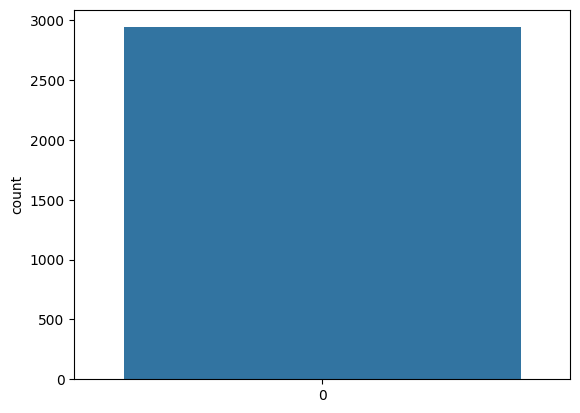

In [100]:
sns.countplot(df['DistanceFromHome'])

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

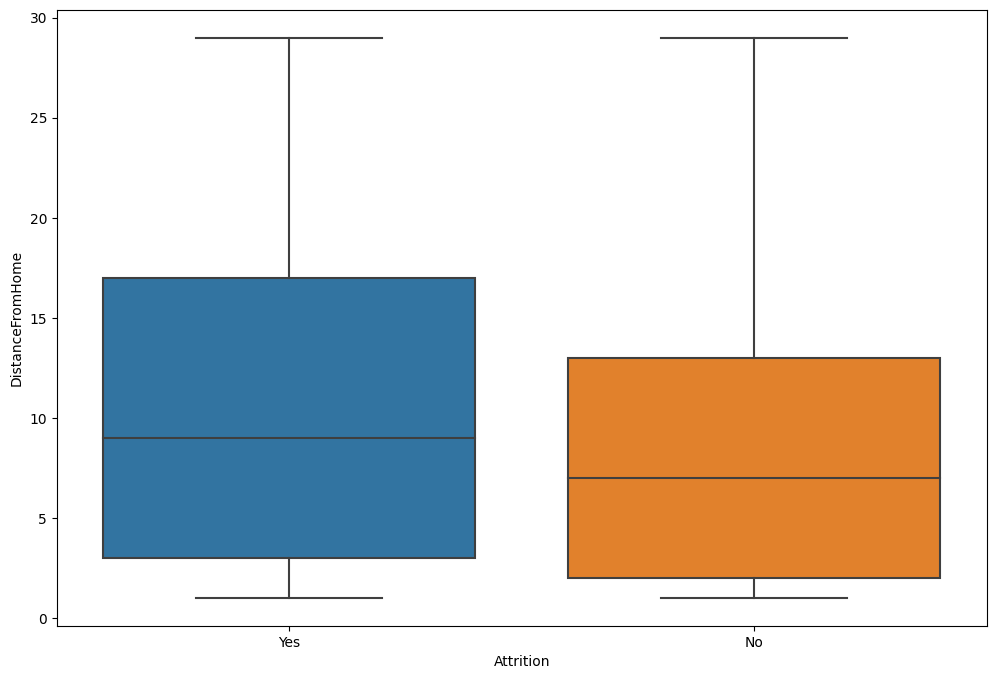

In [129]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Attrition', y = 'DistanceFromHome', data=df)

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

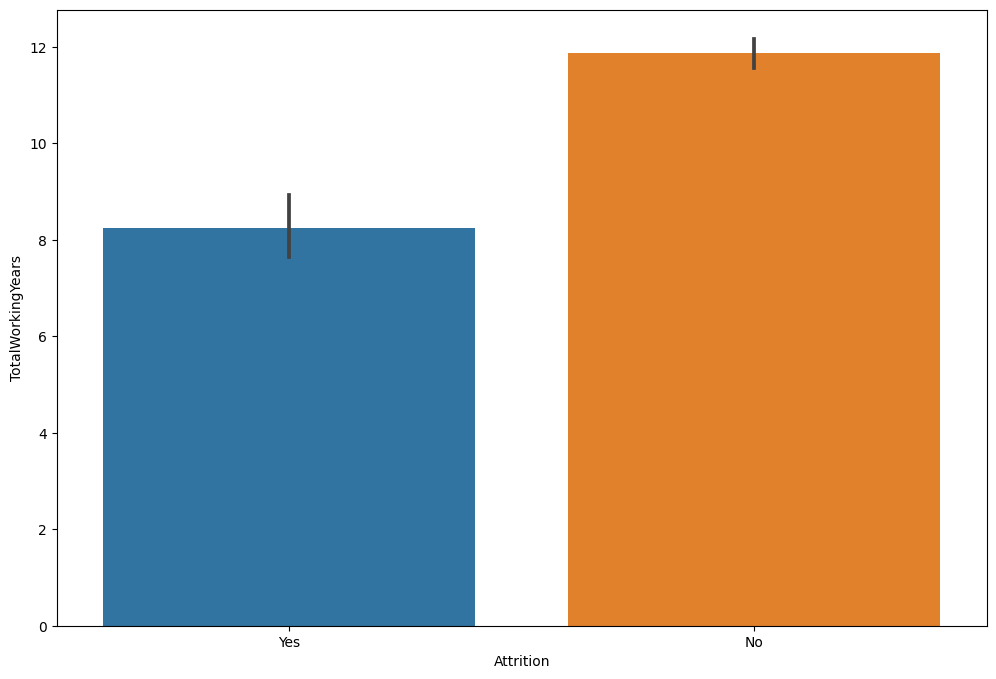

In [128]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Attrition', y = 'TotalWorkingYears', data=df)

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

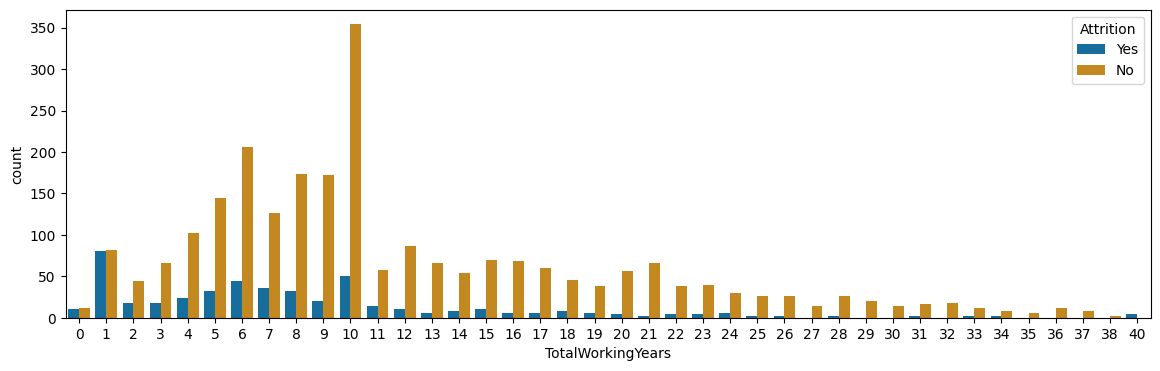

In [130]:
plt.subplots(figsize=(14,4))
sns.countplot(x='TotalWorkingYears', hue='Attrition', data = df, palette = 'colorblind')

<Axes: ylabel='count'>

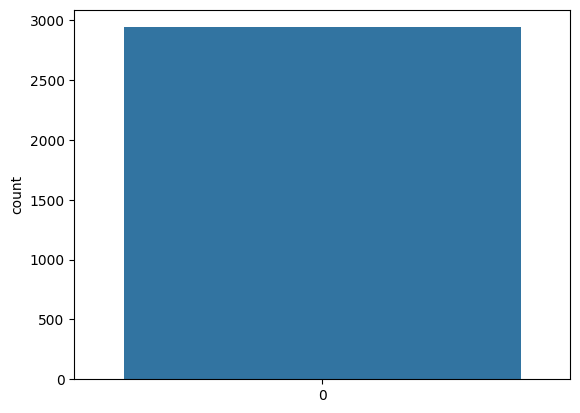

In [131]:
sns.countplot(df['TotalWorkingYears'])

In [132]:
df['TotalWorkingYears'].value_counts()

10    404
6     250
8     206
9     192
5     176
7     162
1     162
4     126
12     96
3      84
15     80
16     74
11     72
13     72
21     68
17     66
2      62
14     62
20     60
18     54
19     44
23     44
22     42
24     36
25     28
28     28
26     28
0      22
29     20
31     18
32     18
30     14
33     14
27     14
36     12
34     10
37      8
35      6
40      4
38      2
Name: TotalWorkingYears, dtype: int64

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

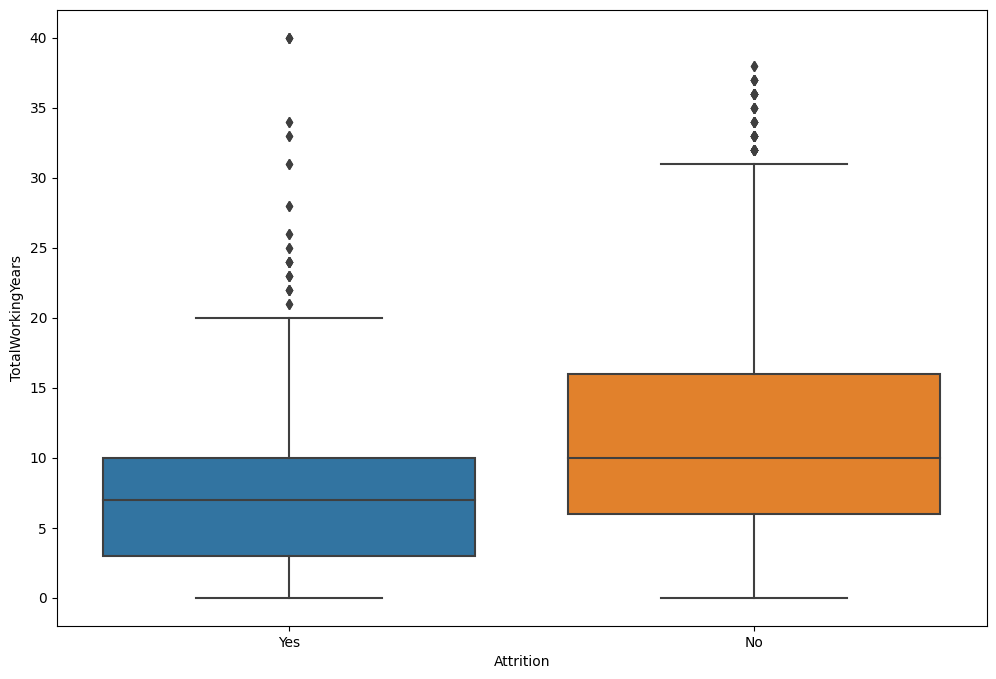

In [133]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Attrition', y = 'TotalWorkingYears', data=df)

In [106]:
for column in df.columns:
   if df[column].dtype == object :
     print(str(column) + ' : ' + str(df[column].unique()))
     print(df[column].value_counts())
     print('_____________________________________________________')

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
_____________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
_____________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
_____________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
_____________________________________________________
Gender : ['Female' 'Male']
Male      1764
Fema

<Axes: xlabel='Education', ylabel='Age'>

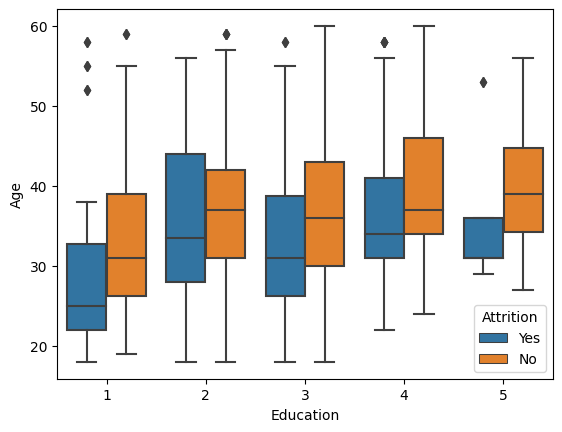

In [107]:
sns.boxplot(x = 'Education', y = 'Age', data = employee, whis=1.5, hue='Attrition', fliersize=5)

<Axes: xlabel='DistanceFromHome', ylabel='TotalWorkingYears'>

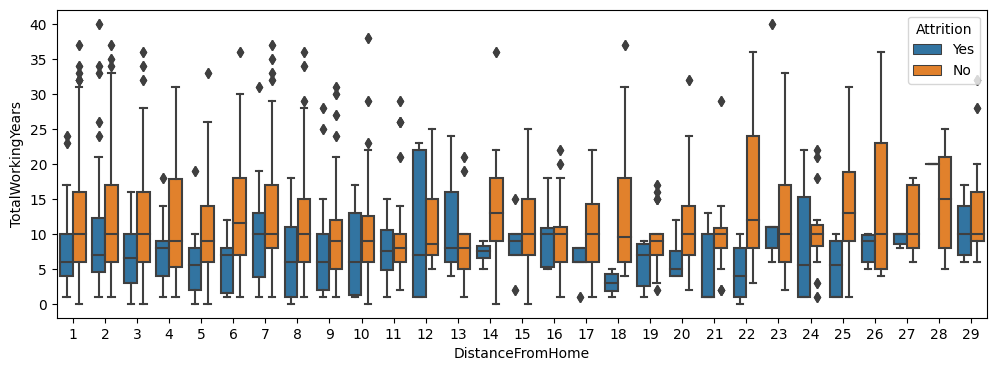

In [134]:
plt.subplots(figsize=(12,4))
sns.boxplot(x = 'DistanceFromHome', y = 'TotalWorkingYears', data = employee, whis=1.5, hue='Attrition', fliersize=5)

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

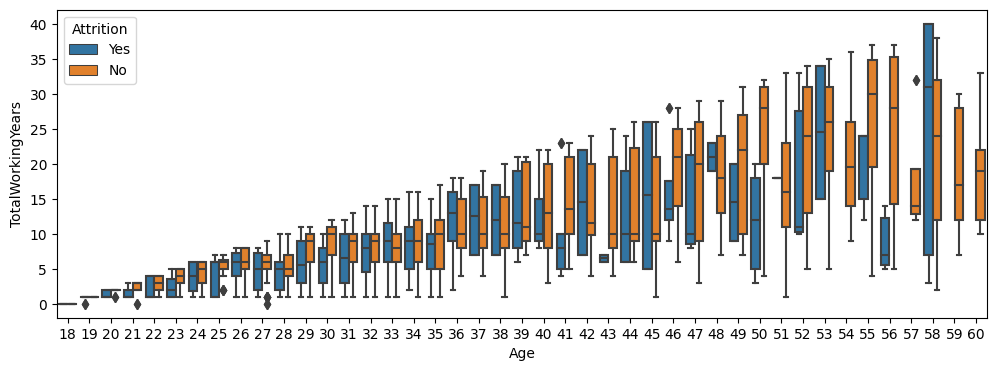

In [135]:
plt.subplots(figsize=(12,4))
sns.boxplot(x = 'Age', y = 'TotalWorkingYears', data = employee, whis=1.5, hue='Attrition', fliersize=5)

<Axes: >

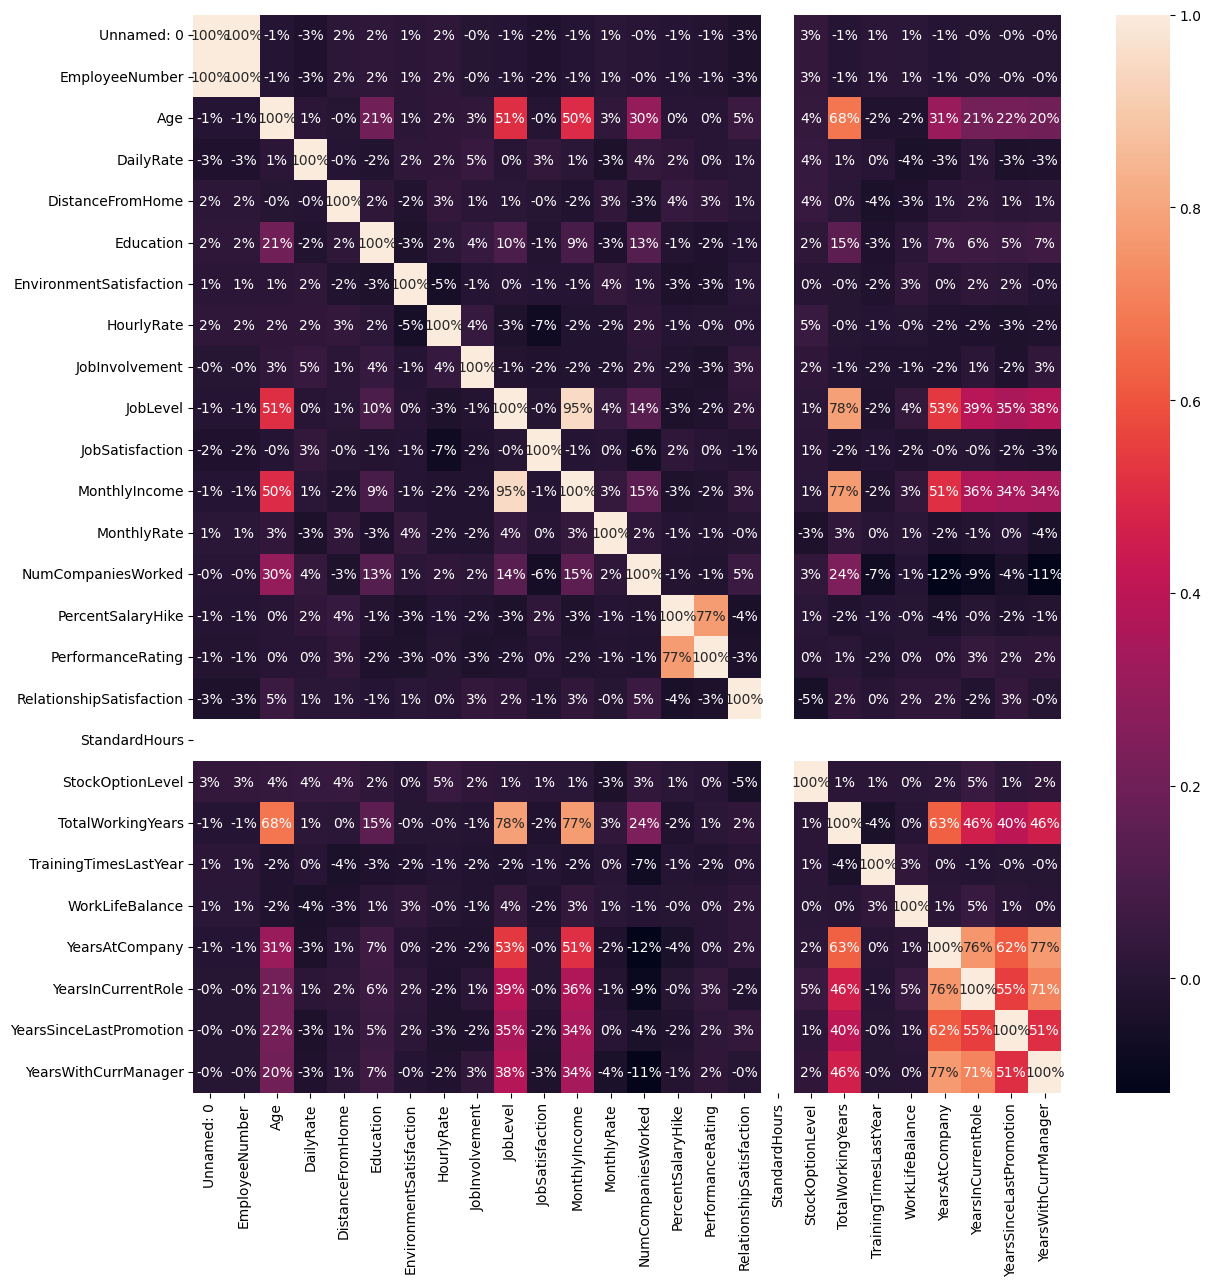

In [138]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt= '.0%')